# 비계층적 클러스터링

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(2021)  # 재현 가능성 확보보

## 라이브러리와 데이터 준비

In [4]:
from sklearn.datasets import make_blobs

# 샘플 데이터 생성 (정답 레이블 포함)
data, label = make_blobs(n_samples=1500, random_state=170)

In [5]:
data

array([[-5.19811282e+00,  6.41869316e-01],
       [-5.75229538e+00,  4.18627111e-01],
       [-1.08448984e+01, -7.55352273e+00],
       ...,
       [ 1.36105255e+00, -9.07491863e-01],
       [-3.54141108e-01,  7.12241630e-01],
       [ 1.88577252e+00,  1.41185693e-03]])

In [6]:
label

array([1, 1, 0, ..., 2, 2, 2])

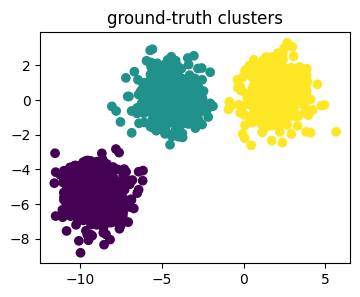

In [ ]:
plt.figure(figsize=(4, 3))
plt.title("ground-truth clusters") # 실제 군집의 구조
plt.scatter(data[:, 0], data[:, 1], c=label)
plt.show()

## K Means

### K-Means – 올바른 k(=3)

In [13]:
from sklearn.cluster import KMeans

kmeans_correct = KMeans(n_clusters=3, random_state=2021)   # k=3 으로 설정
kmeans_correct.fit(data)          # 학습
pred_correct = kmeans_correct.predict(data)   # 예측(레이블)
center_correct = kmeans_correct.cluster_centers_  # 중심 좌표

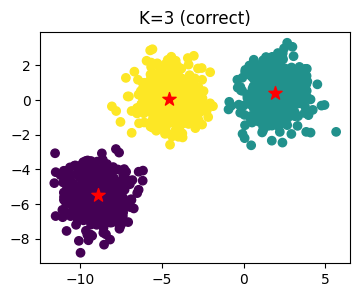

In [ ]:
plt.figure(figsize=(4, 3))
plt.title("K=3 (correct)")
plt.scatter(data[:, 0], data[:, 1], c=pred_correct) #  모든 행(row)을 가져오되, 0번째(첫 번째) 열만 선택  → x좌표 배열  , 모든 행의 1번째(두 번째) 열만 선택    
plt.scatter(center_correct[:, 0], center_correct[:, 1],
            marker="*", s=100, color="red")
plt.show()

K-Means – k가 2(작음) / 4(큼)일 때

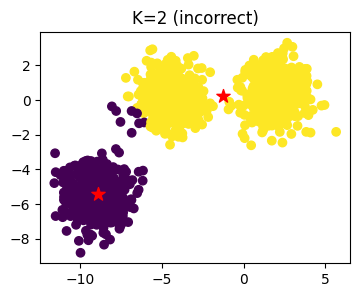

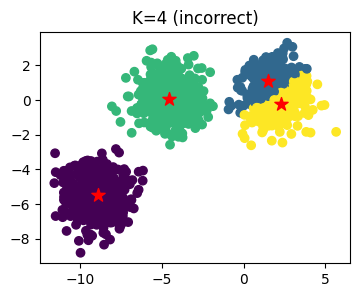

In [16]:
for k in [2, 4]:
    km = KMeans(n_clusters=k, random_state=2021)
    pred = km.fit_predict(data)
    centers = km.cluster_centers_
    plt.figure(figsize=(4, 3))
    plt.title(f"K={k} (incorrect)")
    plt.scatter(data[:, 0], data[:, 1], c=pred)
    plt.scatter(centers[:, 0], centers[:, 1],
                marker="*", s=100, color="red")
    plt.show()

## Elbow 방법으로 적정 k 찾기

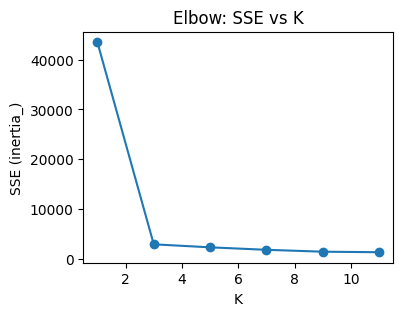

In [17]:
sse = []
k_list = range(1, 12, 2)  # 1,3,5,7,9,11
for k in k_list:
    km = KMeans(n_clusters=k, random_state=2021)
    km.fit(data)
    sse.append(km.inertia_)      # inertia_ = SSE

plt.figure(figsize=(4, 3))
plt.plot(k_list, sse, marker="o")
plt.title("Elbow: SSE vs K")
plt.xlabel("K")
plt.ylabel("SSE (inertia_)")
plt.show()

## 서로 다른 '크기' 군집에서의 한계

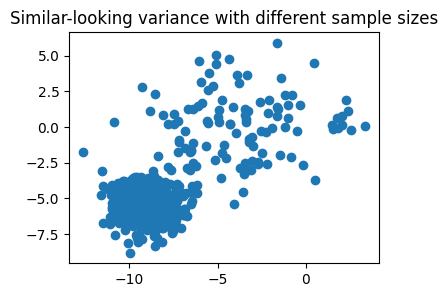

In [ ]:
size_data, size_label = make_blobs(
    n_samples=1500,
    cluster_std=[1.0, 2.5, 0.5],  # 분산 차이를 준 뒤
    random_state=170
)
# 샘플 수를 500:100:10으로 편향
size_data = np.vstack((
    size_data[size_label == 0][:500],
    size_data[size_label == 1][:100],
    size_data[size_label == 2][:10]
))
plt.figure(figsize=(4, 3))
plt.title("Similar-looking variance with different sample sizes") # 비슷해 보이는 분산 + 다른 샘플 수
plt.scatter(size_data[:, 0], size_data[:, 1])
plt.show()

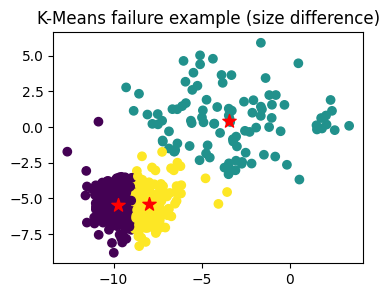

In [ ]:
size_km = KMeans(n_clusters=3, random_state=2021)
size_pred = size_km.fit_predict(size_data)
plt.figure(figsize=(4, 3))
plt.title("K-Means failure example (size difference)") # K-Means 실패 예 (크기 차이)
plt.scatter(size_data[:, 0], size_data[:, 1], c=size_pred)
plt.scatter(size_km.cluster_centers_[:, 0], size_km.cluster_centers_[:, 1],
            marker="*", s=100, color="red")
plt.show()

## 서로 다른 '밀도' 군집에서의 한계

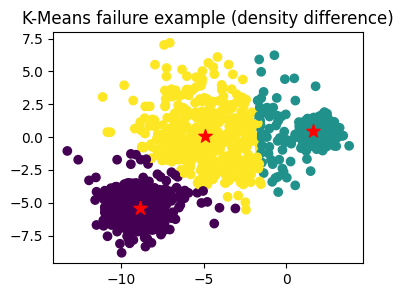

In [23]:
density_data, density_label = make_blobs(
    n_samples=1500,
    cluster_std=[1.0, 2.5, 0.5],
    random_state=170
)
density_km = KMeans(n_clusters=3, random_state=2021)
density_pred = density_km.fit_predict(density_data)
plt.figure(figsize=(4, 3))
plt.title("K-Means failure example (density difference)") # K-Means 실패 예 (밀도 차이)
plt.scatter(density_data[:, 0], density_data[:, 1], c=density_pred)
plt.scatter(density_km.cluster_centers_[:, 0], density_km.cluster_centers_[:, 1],
            marker="*", s=100, color="red")
plt.show()

## 지역적 패턴이 있는 군집에서의 한계

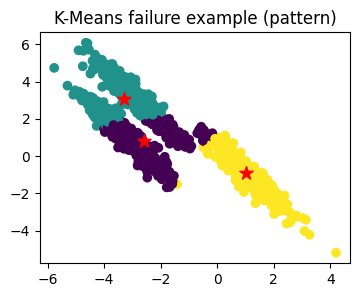

In [ ]:
transformation = [[0.60834549, -0.63667341],
                  [-0.40887718,  0.85253229]]
pattern_data = np.dot(data, transformation)  # 선형 변환으로 기울기/모양 변경

pattern_km = KMeans(n_clusters=3, random_state=2021)
pattern_pred = pattern_km.fit_predict(pattern_data)
plt.figure(figsize=(4, 3))
plt.title("K-Means failure example (pattern)")  ## K-Means 실패 예 (패턴)
plt.scatter(pattern_data[:, 0], pattern_data[:, 1], c=pattern_pred)
plt.scatter(pattern_km.cluster_centers_[:, 0], pattern_km.cluster_centers_[:, 1],
            marker="*", s=100, color="red")
plt.show()

## DBSCAN

### 서로 다른 크기의 군집

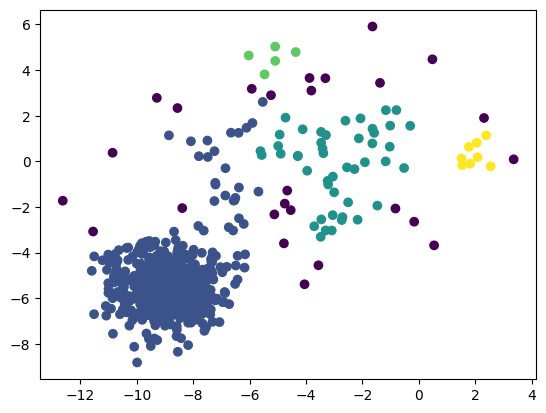

In [39]:
from sklearn.cluster import DBSCAN

size_dbscan = DBSCAN(eps=1.0)
size_db_pred = size_dbscan.fit_predict(size_data)
plt.scatter(size_data[:, 0], size_data[:, 1], c=size_db_pred)

## 밀도차이

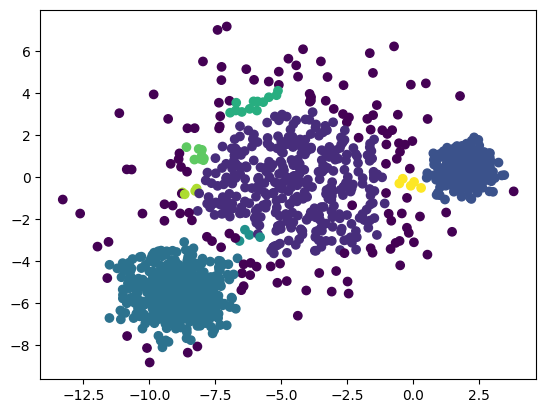

In [40]:
density_dbscan = DBSCAN()
density_db_pred = density_dbscan.fit_predict(density_data)
plt.scatter(density_data[:, 0], density_data[:, 1], c=density_db_pred)


## 지역적 패턴이 있는 군집

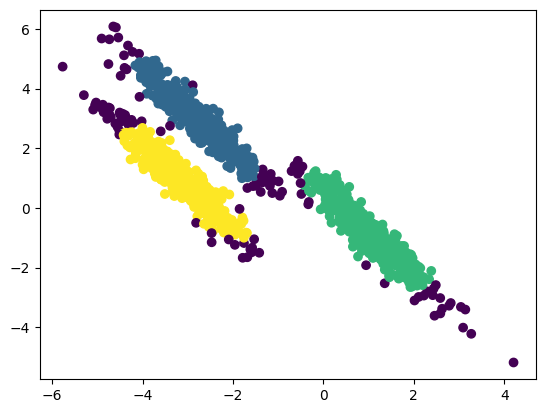

In [43]:
pattern_db = DBSCAN(eps=.3, min_samples=20)
pattern_db_pred = pattern_db.fit_predict(pattern_data)
plt.scatter(pattern_data[:, 0], pattern_data[:, 1], c=pattern_db_pred)